In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
import cv2
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14570, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 14570 (delta 46), reused 50 (delta 26), pack-reused 14478
Receiving objects: 100% (14570/14570), 13.74 MiB | 25.91 MiB/s, done.
Resolving deltas: 100% (10019/10019), done.


In [5]:
model = torch.hub.load('./yolov5', 'custom', path='/content/drive/MyDrive/YoloV5x2/weights/best.pt', source='local')

YOLOv5 🚀 v7.0-38-g4362372 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
YOLOv5x summary: 322 layers, 86200330 parameters, 0 gradients
Adding AutoShape... 


[{'xmin': 166.81637573242188, 'ymin': 353.8735046386719, 'xmax': 374.6204528808594, 'ymax': 730.136474609375, 'confidence': 0.8675956130027771, 'class': 0, 'name': 'calca'}, {'xmin': 146.78028869628906, 'ymin': 150.34893798828125, 'xmax': 366.8721618652344, 'ymax': 361.1084899902344, 'confidence': 0.8008096218109131, 'class': 1, 'name': 'camisa'}]


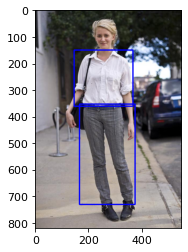

In [10]:
frame = cv2.imread('/content/0122.jpg')
  
detections = model(frame)

# Convert results to Pandas style
results = detections.pandas().xyxy[0].to_dict(orient="records")
print(results)

for result in results:
    cv2.rectangle(frame, (int(result['xmin']), int(result['ymin'])), (int(result['xmax']), int(result['ymax'])), (255,0,0), 4)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame)
plt.show()